In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats


In [3]:
# Read data, replace missing data by '?'
df = pd.read_csv("SkillCraft1_Dataset.csv", na_values=["?"])

In [4]:
df.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,52,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0,0.000000
1,55,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001194,5,0,0.000208
2,56,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0,0.000189
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0,0.000019


In [5]:
# Groupby returns strange object which exposes few things. 
# If you know SQL this is something that enables you to finish the query (for instance calculate mean in groups)
strange_obj = df.groupby("LeagueIndex")


In [6]:
m = strange_obj['APM']


In [7]:
strange_obj['APM'].median()


LeagueIndex
1     54.0450
2     71.6754
3     85.9590
4    103.8072
5    126.0075
6    152.1852
7    185.3424
8    274.3404
Name: APM, dtype: float64

In [8]:
# Besides being strange, it is also a list of tuples, where
# each tuple is simply value of column grouped on (or set of columns) and resulting DataFrame
print("Different LeagueIndexes" + str(len(strange_obj)))
dfs = list(strange_obj)
print("LeagueIndex=" + str(dfs[0][0]))
dfs[0][1].head()

Different LeagueIndexes8
LeagueIndex=1


,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
36,171,1,18,6,230,69.5076,0.000175,0.000204,4,0.000058,0.000204,0.001459,45.0612,112.9600,9.1400,11,0.000584,4,0.000000,0.000000
106,363,1,33,4,120,68.6598,0.000302,0.000323,0,0.000000,0.000062,0.002396,48.6812,87.5130,5.4130,23,0.000542,6,0.000000,0.000208
167,532,1,22,20,315,54.0792,0.001258,0.000296,3,0.000037,0.000481,0.002182,37.1724,111.6610,3.9492,14,0.001332,5,0.000000,0.000000
187,590,1,19,16,730,60.4956,0.000831,0.000082,2,0.000000,0.000615,0.002195,103.9624,93.3271,5.2103,36,0.001292,7,0.000318,0.000462


LeagueIndex
1    Axes(0.125,0.125;0.775x0.775)
2    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
4    Axes(0.125,0.125;0.775x0.775)
5    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
7    Axes(0.125,0.125;0.775x0.775)
8    Axes(0.125,0.125;0.775x0.775)
Name: APM, dtype: object

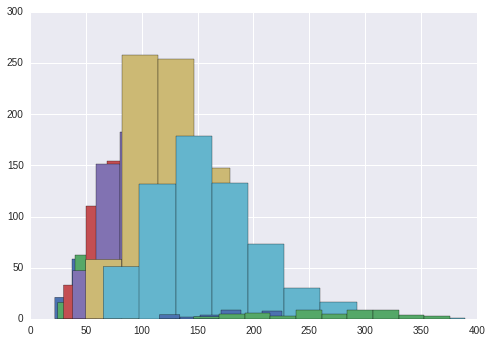

In [9]:
strange_obj['APM'].hist()


In [10]:
df.groupby("LeagueIndex").size()


LeagueIndex
1    167
2    347
3    553
4    811
5    806
6    621
7     35
8     55
dtype: int64

In [11]:
df.groupby("LeagueIndex")['APM'].mean() # Average clicks per minute


LeagueIndex
1     59.539277
2     74.780917
3     89.971260
4    105.847166
5    131.520718
6    158.683211
7    189.555686
8    267.341236
Name: APM, dtype: float64

/usr/lib/pymodules/python2.7/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


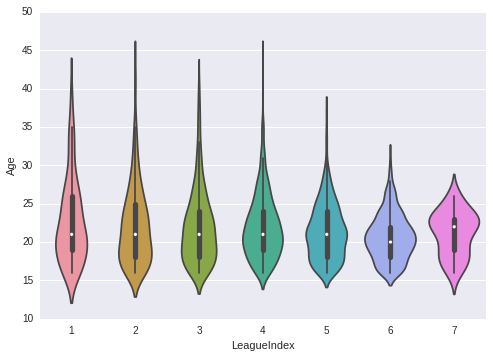

In [12]:
sns.violinplot(x="LeagueIndex", y="Age", data=df, order=[1, 2, 3, 4, 5, 6, 7])


Exercise 1 [are players' ages significantly different across different leagues?, 2 points]

Select all data, where LeagueIndex is in [1,3,6] (you can use df.query() syntax).

Include histograms of ages for each LeagueIndex (3 plots), make sure histograms include legend

Include boxplot of ages for each LeagueIndex

What is the mean and std of age for each LeagueIndex? (you can use groupby)

Perform oneway ANOVA test

In [16]:
indices = [1, 3, 6]
mydf = df.loc[df['LeagueIndex'].isin(indices)]

In [25]:
grouped_mydf = mydf.groupby("LeagueIndex")
grouped_mydf.head()

,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
3,57,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.000000,0.000384
4,58,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.000000,0.000019
6,61,1,21,8,240,46.9962,0.000820,0.000169,6,0.000000,0.000045,0.001988,94.0227,90.5311,4.1017,15,0.000573,5,0.000000,0.000000
10,83,3,16,16,6000,153.8010,0.001677,0.000319,4,0.000000,0.000822,0.003772,23.4107,48.0711,7.0044,24,0.001593,7,0.000000,0.000017
12,97,3,18,12,350,67.4754,0.000423,0.000169,1,0.000024,0.000145,0.002885,42.4370,68.0502,4.3222,16,0.000748,7,0.000000,0.000435
13,98,3,38,6,1000,119.4366,0.004952,0.000052,2,0.000087,0.000035,0.002728,54.8718,79.2102,6.2293,21,0.001494,5,0.000000,0.000000
21,138,6,21,6,500,133.7016,0.004500,0.000420,3,0.000019,0.000075,0.003874,21.4686,50.5253,5.4892,29,0.001008,10,0.000000,0.000560
26,144,6,18,70,2520,267.5586,0.027815,0.000708,10,0.000000,0.000128,0.005616,34.6035,40.6025,4.1629,36,0.000856,12,0.000089,0.000197
29,158,6,18,10,160,150.5004,0.005667,0.000632,6,0.000376,0.000410,0.004626,30.2222,45.5941,4.9077,14,0.001007,6,0.000000,0.000000
33,163,6,16,28,500,161.3466,0.006110,0.000577,9,0.000328,0.000727,0.004135,34.1209,47.1034,5.8466,48,0.001347,9,0.000378,0.000171


LeagueIndex
1    Axes(0.125,0.125;0.775x0.775)
3    Axes(0.125,0.125;0.775x0.775)
6    Axes(0.125,0.125;0.775x0.775)
Name: Age, dtype: object

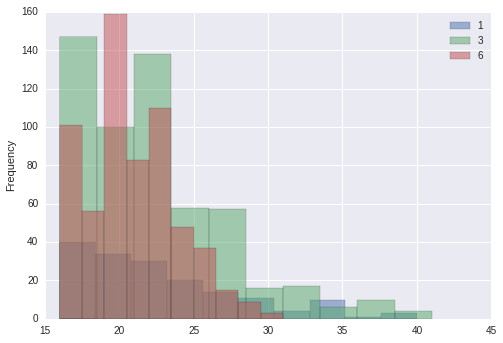

In [29]:
grouped_mydf["Age"].plot.hist(alpha=0.5,legend=True)

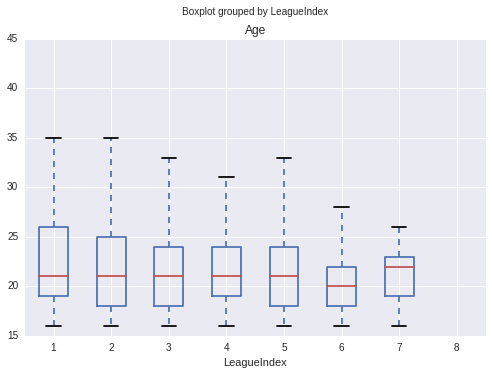

In [38]:
df.boxplot(column="Age", by="LeagueIndex")

In [44]:
grouped_df = df.groupby("LeagueIndex")

print "mean of age:\n",grouped_df["Age"].mean()
print "std of age:\n",grouped_df["Age"].std()

mean of age:
LeagueIndex
1    22.724551
2    22.155620
3    22.050633
4    21.981504
5    21.362283
6    20.677939
7    21.171429
8          NaN
Name: Age, dtype: float64
std of age:
LeagueIndex
1    5.522860
2    5.091531
3    4.901305
4    4.141736
5    3.662164
6    3.030381
7    2.864444
8         NaN
Name: Age, dtype: float64


In [45]:
from scipy import stats